In [2]:
import numpy as np


In [3]:

# Replace path if needed
data = np.loadtxt("/home/hassene/Desktop/Stage_code/mult_dimensional_grids/1450_2_nopti")
print(data.shape)  # Check dimensions
print(data[:5])    # Preview first 5 rows

points = data[:, :2]  # Shape (1450, 2)
weights = data[:, 2]  # Shape (1450,)
print(sum(weights))

(1451, 5)
[[ 3.63170000e-04 -2.26587859e+00  5.06120475e-01  5.50416142e-03
   6.98134193e-02]
 [ 4.49090000e-04 -8.22125559e-01  1.89577201e+00  3.92919334e-03
   5.88395719e-02]
 [ 8.40360000e-04 -1.42771673e+00  1.76773614e-01  2.38441225e-03
   4.59779713e-02]
 [ 3.05350000e-04 -8.85898523e-01 -2.27020919e+00  6.00304795e-03
   7.28702870e-02]
 [ 1.07787000e-03  8.46999479e-01 -5.88780592e-01  1.85822198e-03
   4.05829504e-02]]
6.929076023047829


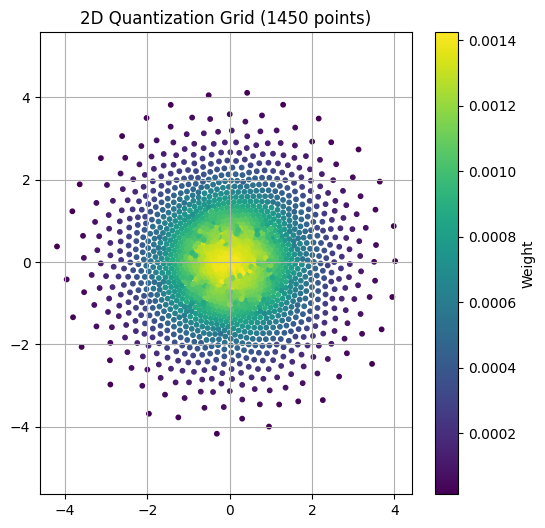

E[||X||²] ≈ 1.9968768343777175
E[exp(-||X||²)] ≈ 0.33348754111523005


In [4]:
import numpy as np

data = np.loadtxt("/home/hassene/Desktop/Stage_code/Docs/gauss_2d_quantization_1450.txt")

# Exclude last row (global distortions)
points = data[:-1, 1:3]    # Shape (1450, 2)
weights = data[:-1, 0]     # Shape (1450,)
local_L2 = data[:-1, 3]    # Shape (1450,)
local_L1 = data[:-1, 4]    # Shape (1450,)

# Global distortions
global_L2 = data[-1, 3]
global_L1 = data[-1, 4]
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(points[:, 0], points[:, 1], s=10, c=weights, cmap='viridis')
plt.colorbar(label='Weight')
plt.title("2D Quantization Grid (1450 points)")
plt.axis("equal")
plt.grid(True)
plt.show()
expectation_norm_sq = np.sum(np.sum(points**2, axis=1) * weights)
print("E[||X||²] ≈", expectation_norm_sq)
f_vals = np.exp(-np.sum(points**2, axis=1))
approx = np.sum(f_vals * weights)
print("E[exp(-||X||²)] ≈", approx)


In [5]:
import numpy as np

# Inputs
mu_x = 0
mu_y = 1
s11 = 1
s22 = 4
s12=0

mu = np.array([mu_x, mu_y])        # mean vector
Sigma = np.array([[s11, s12],      # covariance matrix
                  [s12, s22]])

# Grid from quantization (for N(0, I_2))
points = data[:-1, 1:3]
weights = data[:-1, 0]

# Get A such that Sigma = A A^T
A = np.linalg.cholesky(Sigma)  # or use scipy.linalg.sqrtm for more general sqrt

# Transform quantization points
transformed_points = points @ A.T + mu  # shape (N, 2)
def f(x, y):
    return x + y  # example

f_vals = np.array([f(x, y) for x, y in transformed_points])
expectation = np.sum(f_vals * weights)
print(expectation)

0.9999228349244699


In [ ]:
def gaussian_expectation(f, mu, Sigma, points=points, weights=weights):
    A = np.linalg.cholesky(Sigma + 1e-8*np.eye(2))  # Cholesky: Sigma = A @ A.T

    # Transform quantization points from N(0, I_2) to N(mu, Sigma)
    transformed_points = points @ A.T + mu  # Shape (N, 2)

    # Evaluate f at each transformed point
    f_vals = np.array([f(x, y) for x, y in transformed_points])

    # Weighted sum
    return np.sum(f_vals * weights)


In [7]:
import numpy as np

data = np.loadtxt("/home/hassene/Desktop/Stage_code/one_dim_1001_5999/5999_1_nopti")

# Quantization points and weights for 1D
points = data[:-1, 1]     # shape (N,)
weights = data[:-1, 0]    # shape (N,)

def gaussian_expectation(f, mu, Sigma, points=points, weights=weights):
    A = np.sqrt(Sigma)  # Sigma is scalar in 1D

    transformed_points = points * A + mu  # shape (N,)
    f_vals = np.array([f(x) for x in transformed_points])  # shape (N,)

    return np.sum(f_vals * weights)

def f(x):
    return float(x**3)

# Test: E[X²] for X ~ N(0,1) should be ~1
print("E[X²] =", gaussian_expectation(f, 0.0, 1.0))


E[X²] = -1.1102230246251565e-16
